# Teaching objectives
The students are expected to:
  - describe the sustainable development goals (SDG)
  - explain the link between the energy consumption and SDG indices
  - analyze the energy supply and demand of a European country
  - quantify the average energy demand of a European person
  - quantitatively explain the potential role of hydrogen in future energy systems and achieving SDGs

## Teaching material
All the data and Python codes will be shared with the participants. Working with real data is the best way to learn to describe sustainability in "numbers; not adjectives".


# Sustainable Development Goals (SDG)
Here's the first paragraph of the history of SDGs from the [official UN website](https://sdgs.un.org/goals):
 > The 2030 Agenda for Sustainable Development, adopted by all United Nations Member States in 2015, provides a shared blueprint for __peace and prosperity for people and the planet__, now and into the future. At its heart are the __17 Sustainable Development Goals (SDGs)__, which are an __urgent call for action__ by all countries - developed and developing - in a global partnership. They recognize that __ending poverty and other deprivations__ must go hand-in-hand with strategies that __improve health and education__, __reduce inequality__, and spur __economic growth__ – all __while tackling climate change__ and working to __preserve our oceans and forests__.  
 
![SDG Image](../resources/Sustainable_Development_Goals.svg.png)

## SDGs and energy
The SDGs are not independent of each other. There are strong correlations between some of these goals. Energy consumption of a nation, for instance, is strongly linked to the prosperity of a nation. Note that we try to avoid a cause and effect interpretation here: so it does not matter if the prosperity comes first and lead to a higher energy consumption that seems to be an indicator of a better life style, or having a lot of energy leads to prosperity and a better life. Let's have a look at the data. We will use the national energy consumption data from [our world in data](), gross national product (GDP) from [the World Bank](), national direct CO2 emission from [our world in data](), and finally the sustainable development indices from [the sustainable development report website](https://dashboards.sdgindex.org/downloads)

In [2]:
# load energy data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
energy = pd.read_csv('../data/owid-energy-data.csv')
# filter for the final year of data
energy = energy[energy['year'] == 2022].reset_index(drop=True)
# remove iso_code = NaN
energy = energy[energy['iso_code'].notna()].reset_index(drop=True)
energy['energy_per_capita'] = energy['energy_per_capita']/365 # to kWh/person/day

CO2 = pd.read_csv('../data/co-emissions-per-capita.csv')
# change column name from 'Entity' to 'country' and 'Code' to 'iso_code'
CO2.rename(columns={'Entity':'country', 'Code':'iso_code', 'Year': 'year'}, inplace=True)
# filter for Year == 2022
CO2 = CO2[CO2['year'] == 2022].reset_index(drop=True)
# remove iso_code = NaN or iso_code = OWID_WRL
CO2 = CO2[CO2['iso_code'].notna()].reset_index(drop=True)
CO2 = CO2[CO2['iso_code'] != 'OWID_WRL'].reset_index(drop=True)

# load data for sustainable development goals
sdg = pd.read_excel('../data/SDR2024-data.xlsx', sheet_name='Full Database')
# change column name from 'Country Code ISO3' to iso_code
sdg.rename(columns={'Country Code ISO3':'iso_code', 'Country': 'country'}, inplace=True)
# remove iso_code that contains _
sdg = sdg[~sdg['iso_code'].str.contains('_')].reset_index(drop=True)

# working with greenhouse_gas_emissions, energy_per_capita (kWh/person), energy_per_gdp
# all per capita are reported in kWh/person

In [3]:
# extract sdg columns 'Goal 1 Score' to 'Goal 17 Score', and country name and iso_code
sdg_score = sdg[['country', 'iso_code', 'Goal 1 Score', 'Goal 2 Score', 'Goal 3 Score', 'Goal 4 Score', 'Goal 5 Score', 'Goal 6 Score', 'Goal 7 Score', 'Goal 8 Score', 'Goal 9 Score', 'Goal 10 Score', 'Goal 11 Score', 'Goal 12 Score', 'Goal 13 Score', 'Goal 14 Score', 'Goal 15 Score', 'Goal 16 Score', 'Goal 17 Score']].copy()
# merge energy, CO2, and sdg_score
df = pd.merge(energy, CO2, on='iso_code', how='inner')
df = pd.merge(df, sdg_score, on='iso_code', how='inner')
df['gdp_per_capita'] = df['gdp']/df['population']

,country_x,year_x,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score,gdp_per_capita
0,Afghanistan,2022,AFG,41128772.0,5.330347e+10,NaN,NaN,NaN,NaN,0.000,...,16.123429,NaN,34.509750,95.540714,98.914667,NaN,77.4748,41.422909,43.48660,1296.014190
1,Albania,2022,ALB,2842318.0,3.617101e+10,NaN,NaN,NaN,NaN,0.000,...,48.404429,92.4490,88.891667,79.107714,89.565500,49.186000,82.2742,62.367364,68.37960,12725.882872
2,Algeria,2022,DZA,44903228.0,5.958200e+11,NaN,NaN,NaN,NaN,0.000,...,52.316143,97.0150,68.482750,88.713143,87.224500,64.772167,65.9196,65.156273,73.36400,13268.979676
3,Angola,2022,AGO,35588996.0,1.583462e+11,NaN,NaN,NaN,NaN,1.405,...,21.181429,16.4790,42.364750,94.465857,94.550667,67.379167,66.5306,40.944545,54.28880,4449.303605
4,Antigua and Barbuda,2022,ATG,93772.0,NaN,NaN,NaN,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Venezuela,2022,VEN,28301700.0,1.496821e+11,NaN,NaN,NaN,NaN,0.000,...,38.641286,28.5715,62.127000,82.052667,86.544500,82.581500,78.3348,29.704200,57.94900,5288.801072
181,Vietnam,2022,VNM,98186856.0,8.338038e+11,NaN,NaN,NaN,NaN,3.666,...,62.994571,67.8075,80.091000,83.375857,90.038333,48.111500,41.4916,63.726909,69.93125,8492.010841
182,Yemen,2022,YEM,33696612.0,6.085299e+10,NaN,NaN,NaN,NaN,0.000,...,16.158857,66.2925,48.444750,96.202429,98.460000,74.983333,50.2930,38.936000,48.95450,1805.908382
183,Zambia,2022,ZMB,20017670.0,6.846960e+10,NaN,NaN,NaN,NaN,3.996,...,33.069143,10.0000,47.983250,94.840857,98.466333,NaN,68.2324,45.187909,64.82760,3420.458243


In [56]:
# plot energy_per_gdp vs sdg score in an interactive plot
import plotly.express as px
fig = px.scatter(df, x='energy_per_capita', y='Goal 13 Score', hover_data=['country'])
fig.update_xaxes(title_text='Energy per capita, kWh/(day.person)')
fig.show()

# plt.figure(figsize=(10, 6))
# plt.scatter(df['energy_per_capita']/365, df['Goal 1 Score'], color='blue', alpha=0.5)
# plt.xlabel('Energy per capita, kWh/(day.person)')
# plt.ylabel('Goal 7 Score')

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



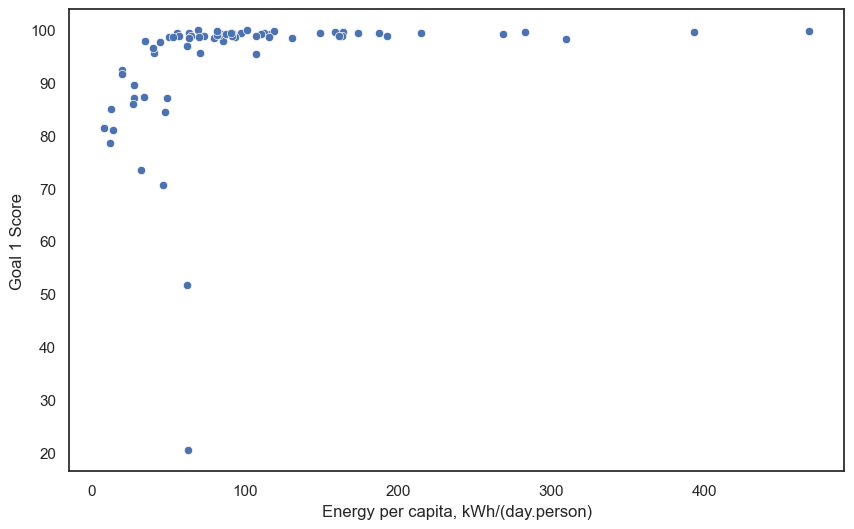

In [43]:
# plot energy_per_gdp vs sdg score 1 with seaborn
sns.set_theme(style='white')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy_per_capita', y='Goal 1 Score')
plt.xlabel('Energy per capita, kWh/(day.person)')
# plt.ylabel('Goal 1 Score')
plt.show()



In [5]:
# plot gdp vs energy_per_capita in an interactive plot
fig = px.scatter(df, x='energy_per_capita', y='gdp_per_capita', hover_data=['country'])
# label x and y axis
fig.update_xaxes(title_text='Energy per capita, kWh/(day.person)')
fig.update_yaxes(title_text='GDP per capita, $')
fig.show()

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



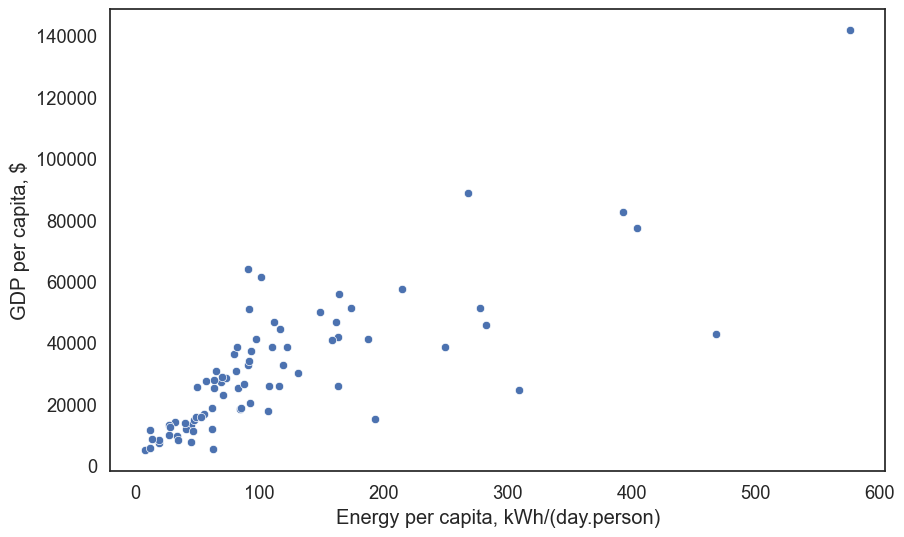

In [17]:
# plot gdp vs energy_per_capita with seaborn
# change seaborn style for a white background
sns.set_theme(style='white', font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_per_capita', y='gdp_per_capita', data=df)
plt.xlabel('Energy per capita, kWh/(day.person)')
plt.ylabel('GDP per capita, $')

# save the plot
plt.savefig('../resources/gdp_vs_energy_per_capita.png')

In [31]:
# lan per person
land = pd.read_csv('../data/land-area-km.csv')
# change column name from 'Entity' to 'country' and 'Code' to 'iso_code' and 'Year' to 'year' and 'Land area (sq. km)' to 'land_area_m2'
land.rename(columns={'Entity':'country', 'Code':'iso_code', 'Year': 'year', 'Land area (sq. km)': 'land_area_m2'}, inplace=True)
land['land_area_m2'] = land['land_area_m2']*1e6 # convert to m^2
last_year = land['year'].max()
land = land[land['year'] == last_year].reset_index(drop=True)
land = land[land['iso_code'].notna()].reset_index(drop=True)
land = land[land['iso_code'] != 'OWID_WRL'].reset_index(drop=True)

# load population data
population = pd.read_csv('../data/population.csv')
population.rename(columns={'Entity':'country', 'Code':'iso_code', 'Year': 'year', 'Population (historical)': 'population'}, inplace=True)
population = population[population['year'] == last_year].reset_index(drop=True)
population = population[population['iso_code'].notna()].reset_index(drop=True)
population = population[population['iso_code'] != 'OWID_WRL'].reset_index(drop=True)

# merge land and population
land_population = pd.merge(land, population, on='iso_code', how='inner')
# remove country_y and year_y columns
land_population.drop(columns=['country_y', 'year_y'], inplace=True)
# rename country_x and year_x columns
land_population.rename(columns={'country_x':'country', 'year_x':'year'}, inplace=True)
footbal_field = 7400 # m^2
land_population['land_per_person'] = land_population['land_area_m2']/land_population['population']
land_population['land_per_person_footbal_field'] = land_population['land_per_person']/footbal_field
land_population

,country,iso_code,year,land_area_m2,population,land_per_person,land_per_person_footbal_field
0,Afghanistan,AFG,2021,6.522300e+11,40000411,16305.582460,2.203457
1,Albania,ALB,2021,2.740000e+10,2849643,9615.239523,1.299357
2,Algeria,DZA,2021,2.381741e+12,44761101,53210.062907,7.190549
3,American Samoa,ASM,2021,2.000000e+08,49248,4061.078622,0.548794
4,Andorra,AND,2021,4.700000e+08,78375,5996.810207,0.810380
...,...,...,...,...,...,...,...
209,Venezuela,VEN,2021,8.820500e+11,28237831,31236.464302,4.221144
210,Vietnam,VNM,2021,3.134290e+11,98935101,3168.026280,0.428112
211,Yemen,YEM,2021,5.279700e+11,37140233,14215.581254,1.921024
212,Zambia,ZMB,2021,7.433900e+11,19603610,37921.076781,5.124470


c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aaeft\venvs\myccs\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



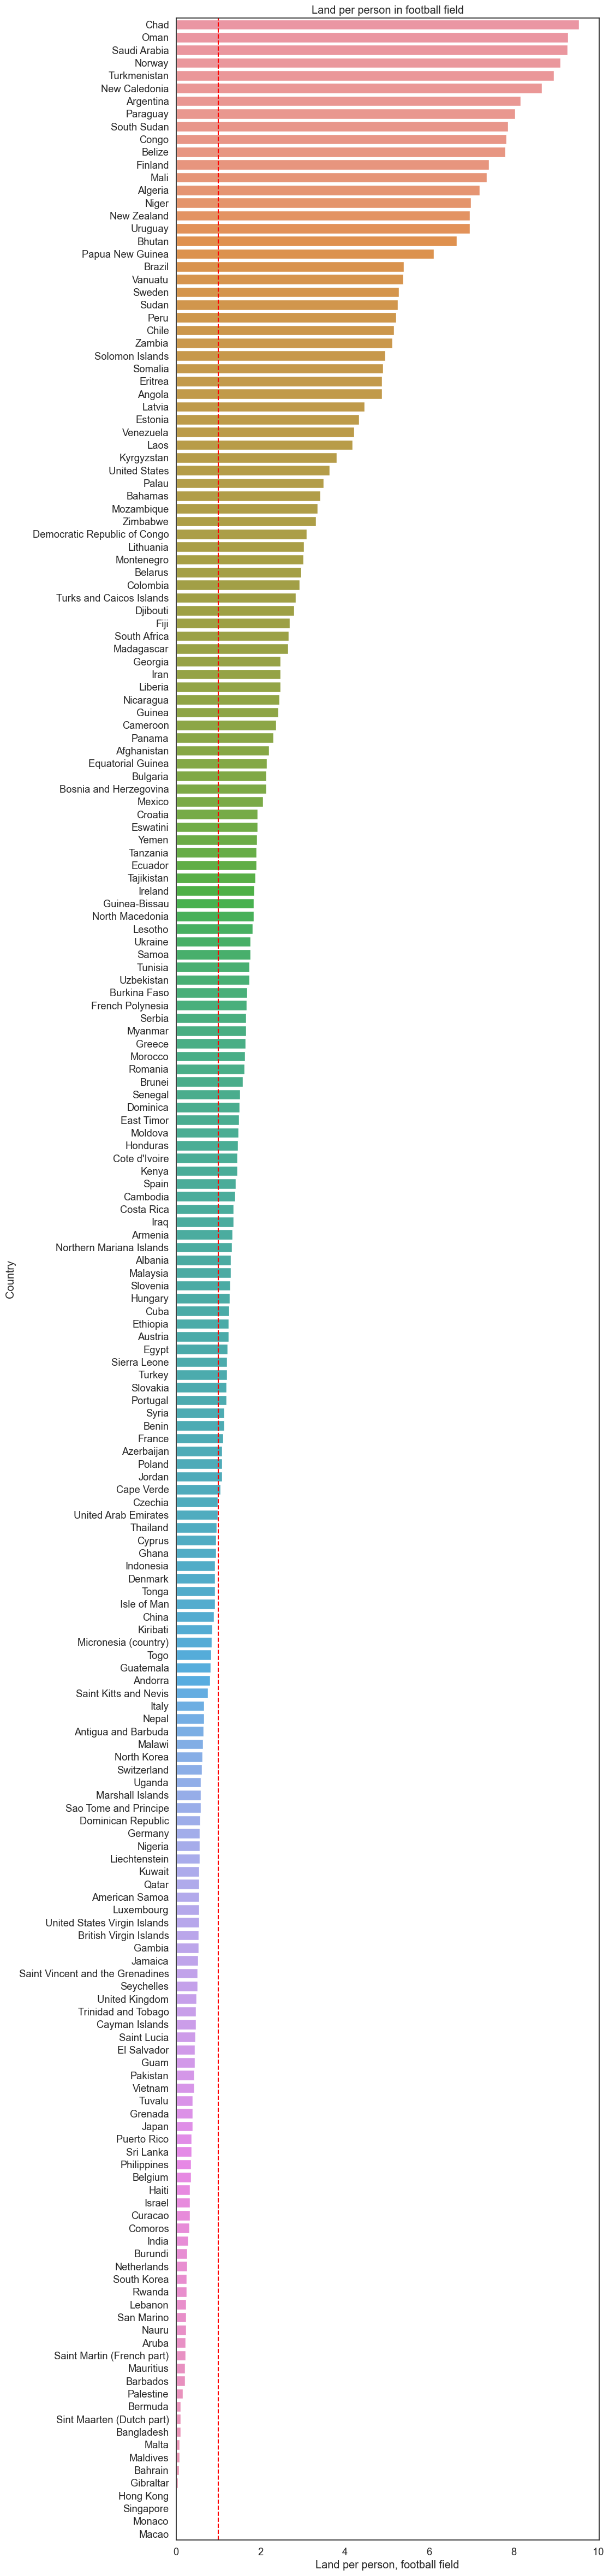

In [37]:
# barchart of land_per_person_footbal_field for countries with <10 football fields
plt.figure(figsize=(10, 60))
sns.barplot(x='land_per_person_footbal_field', y='country', data=land_population[land_population['land_per_person_footbal_field'] < 10].sort_values(by='land_per_person_footbal_field', ascending=False))
plt.xlabel('Land per person, football field')
plt.ylabel('Country')
plt.title('Land per person in football field')
# plot a vertical line at 1 football field
plt.axvline(x=1, color='red', linestyle='--')


In [30]:
105*68

7140

In [22]:
energy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,2022,AFG,41128772.0,5.330347e+10,NaN,NaN,NaN,NaN,0.000,...,9.639,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
1,Albania,2022,ALB,2842318.0,3.617101e+10,NaN,NaN,NaN,NaN,0.000,...,0.571,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
2,Algeria,2022,DZA,44903228.0,5.958200e+11,NaN,NaN,NaN,NaN,0.000,...,0.748,0.230,52.381,0.014,0.042,0.223,0.01,0.929,0.011,0.006
3,American Samoa,2022,ASM,44295.0,NaN,NaN,NaN,NaN,NaN,0.000,...,5.556,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
4,Angola,2022,AGO,35588996.0,1.583462e+11,NaN,NaN,NaN,NaN,1.405,...,0.118,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Venezuela,2022,VEN,28301700.0,1.496821e+11,NaN,NaN,NaN,NaN,0.000,...,0.012,0.000,-15.270,-0.008,0.042,3.180,0.09,1.494,0.106,0.007
206,Vietnam,2022,VNM,98186856.0,8.338038e+11,NaN,NaN,NaN,NaN,3.666,...,10.143,5.396,172.104,14.959,23.701,81.885,8.04,241.391,3.093,1.905
207,Yemen,2022,YEM,33696612.0,6.085299e+10,NaN,NaN,NaN,NaN,0.000,...,20.339,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
208,Zambia,2022,ZMB,20017670.0,6.846960e+10,NaN,NaN,NaN,NaN,3.996,...,0.719,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
